In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)
X = mnist["data"]
y = mnist["target"]

In [2]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
clf

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [4]:
import time
start_time = time.time()
clf.fit(Xtrain,ytrain)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds.")

Training completed in 46.93 seconds.


In [5]:
y_pred = clf.predict(Xtest)

In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred)

In [7]:
accuracy

0.9676

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(Xtrain)
X_test_reduced = pca.transform(Xtest)

In [9]:
clf_pca = RandomForestClassifier(n_estimators=500,n_jobs=-1)
start_time = time.time()
clf_pca.fit(X_train_reduced,ytrain)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds.")




Training completed in 123.34 seconds.


In [10]:
y_pred = clf_pca.predict(X_test_reduced)


In [14]:
accuracy = accuracy_score(ytest, y_pred)
print(f"Test accuracy after PCA: {accuracy:.4f}")

Test accuracy after PCA: 0.9514


Applying t-SNE...


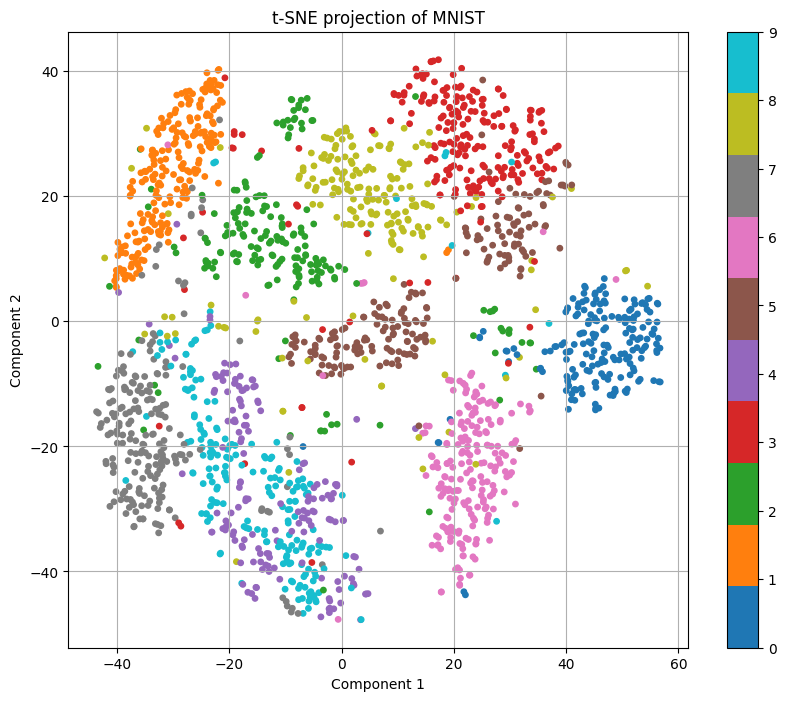

In [17]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, MDS
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
idx = np.random.choice(len(X), 2000, replace=False)
X_subset = X.iloc[idx]
y_subset = y.iloc[idx].astype('int')


print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_subset)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', s=15)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE projection of MNIST")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


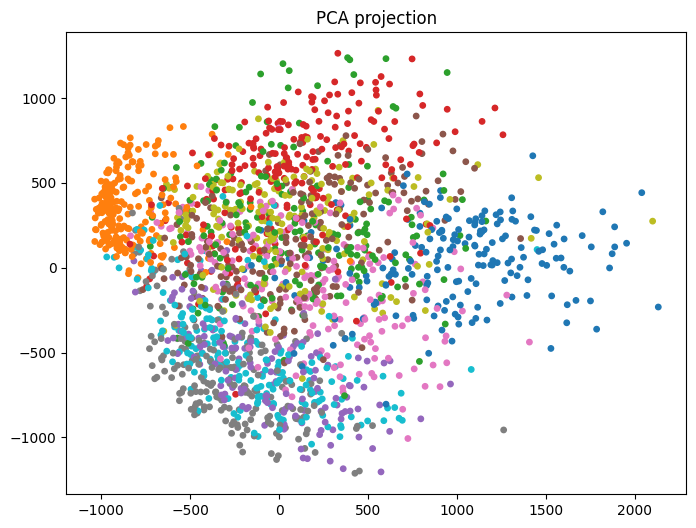

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='tab10', s=15)
plt.title("PCA projection")
plt.show()


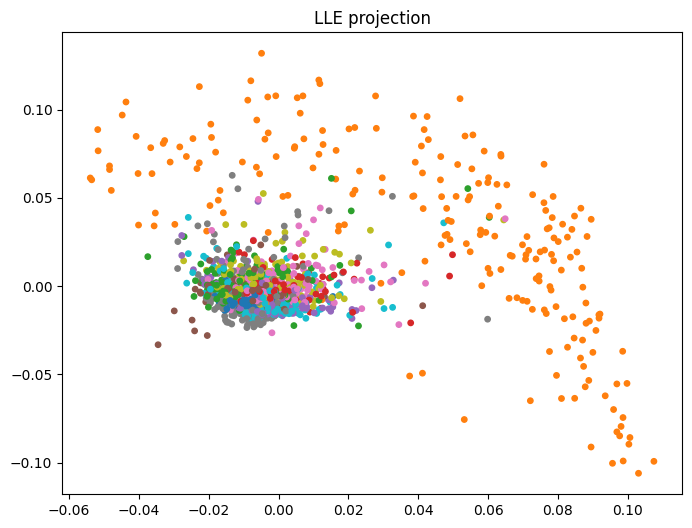

In [19]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30)
X_lle = lle.fit_transform(X_subset)

plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_subset, cmap='tab10', s=15)
plt.title("LLE projection")
plt.show()


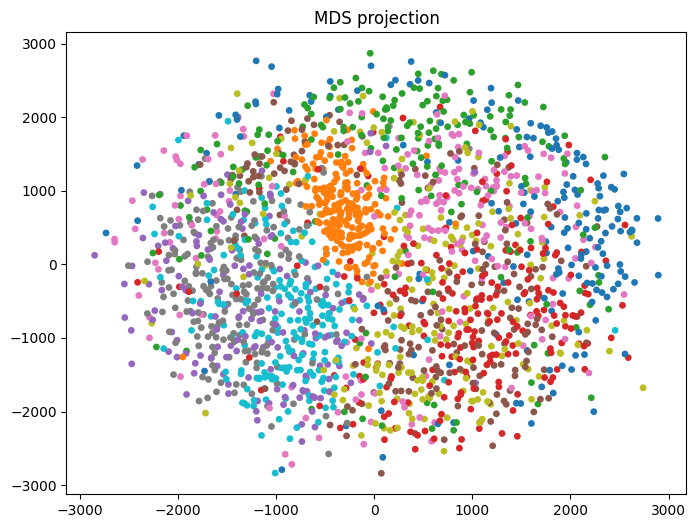

In [20]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_subset)

plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_subset, cmap='tab10', s=15)
plt.title("MDS projection")
plt.show()
